In [110]:
# Importing relevant libraries. 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
# Importing the dataset.

data = pd.read_csv('C:\\Users\\hp\\Desktop\\Titanic dataset from Kaggle\\train.csv')
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [113]:
# Descriptive statistics showing the behavior of the data.

data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [114]:
# Checking for missing values.

print(data.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [115]:
# More information about the data.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [116]:
# filling missing values in Age column with mean age.

import math

# Find the mean age.
# Math.floor is used to round up result to a whole number.
mean_age = math.floor(data.Age.mean())

# Fill the missing values in the Age column with its mean value.
data.Age = data.Age.fillna(mean_age)
data.Age.head(3)

0    22.0
1    38.0
2    26.0
Name: Age, dtype: float64

In [117]:
# Unique age count.

data.Age.value_counts()

29.00    197
24.00     30
22.00     27
18.00     26
28.00     25
19.00     25
30.00     25
21.00     24
25.00     23
36.00     22
27.00     18
32.00     18
35.00     18
26.00     18
16.00     17
31.00     17
33.00     15
23.00     15
34.00     15
20.00     15
39.00     14
17.00     13
42.00     13
40.00     13
45.00     12
38.00     11
50.00     10
2.00      10
4.00      10
47.00      9
        ... 
71.00      2
59.00      2
63.00      2
0.83       2
30.50      2
70.00      2
57.00      2
0.75       2
13.00      2
10.00      2
64.00      2
40.50      2
32.50      2
45.50      2
20.50      1
24.50      1
0.67       1
14.50      1
0.92       1
74.00      1
34.50      1
80.00      1
12.00      1
36.50      1
53.00      1
55.50      1
66.00      1
70.50      1
23.50      1
0.42       1
Name: Age, Length: 88, dtype: int64

In [118]:
# Convert Sex column to dummy to enable integer (weightless integer) operation.

data.Sex = pd.get_dummies(data.Sex)
data.Sex.head(3)

0    0
1    1
2    1
Name: Sex, dtype: uint8

In [119]:
# Unique number of classes and number of passengers in each in descending order.

data.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [120]:
# Choice of independent variables.

# Pclass: Passenger class will determine the preference given to each passenger during the evacuation (rescue) process.
# Sex: The likelihood of survival is usually skewed towards the male, but female are given preference during evacuation.
# Age: The aged and children are given preference during evacuation cos they are considered less likely to survive on their own.

In [121]:
# Defining x and y variables.

x = data.iloc[:, [2,4,5]].values
y = data.iloc[:, 1].values

x

array([[ 3.,  0., 22.],
       [ 1.,  1., 38.],
       [ 3.,  1., 26.],
       ...,
       [ 3.,  1., 29.],
       [ 1.,  0., 26.],
       [ 3.,  0., 32.]])

In [122]:
# Splitting the data into train and test sets.

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.25, random_state = 0)

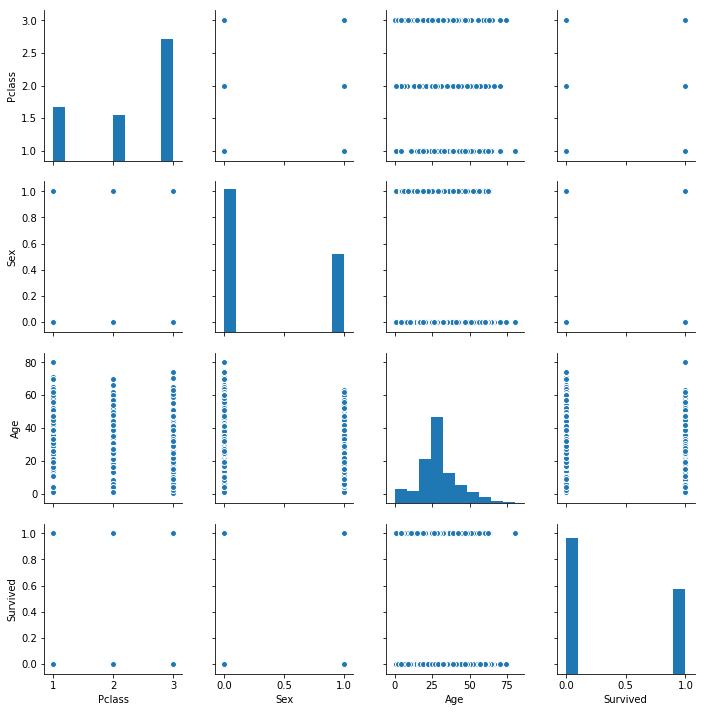

In [123]:
# Plotting the data.

sns.pairplot(data = data [['Pclass', 'Sex', 'Age', 'Survived']])

In [124]:
# Information from the plots.

# The plot between Survived and Pclass show that there were survivors as well as non survivors in each class.
# The plot between Survived and Sex show that survivors and non survivors were both females and males.
# The plot between Survived and Age show that the oldest person survived.

# The plot between Age and Pclass show the age distribution of passengers in each class.
# The plot between Age and Sex show that most of the oldest passengers are females and the oldest is also a female (80years).
# The plot between Sex and Pclass show that both sexes are represented in each class.

In [150]:
#1 EMPLOYING DECISION TREE ALGORITHM,

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 3)
tree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [151]:
y_pred_t = tree.predict(x_test)

In [152]:
print('Training accuracy: {:.3f}'.format(tree.score(x_train,y_train)))
print('Test set accuracy: {:.3f}'.format(tree.score(x_test,y_test)))

Training accuracy: 0.817
Test set accuracy: 0.794


In [180]:
#2 EMPLOYING ADABOOST CLASSIFIER.

# Training the model.

from sklearn.ensemble import AdaBoostClassifier

boost = AdaBoostClassifier(n_estimators = 100)
boost.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=100, random_state=None)

In [181]:
# Predicting with the boosted model.

y_pred_b = boost.predict(x_test)

In [182]:
print('Training accuracy: {:.3f}'.format(boost.score(x_train,y_train)))
print('Test set accuracy: {:.3f}'.format(boost.score(x_test,y_test)))

Training accuracy: 0.820
Test set accuracy: 0.812


In [103]:
#3 EMPLOYING RANDOM FOREST ALGORITHM,

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators = 100, random_state = 0)
forest.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [104]:
y_pred_f = forest.predict(x_test)

In [105]:
print('Training accuracy: {:.3f}'.format(forest.score(x_train,y_train)))
print('Test set accuracy: {:.3f}'.format(forest.score(x_test,y_test)))

Training accuracy: 0.883
Test set accuracy: 0.798


In [106]:
#4 EMPLOYING NAIVE BAYES ALGORITHM

from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(x_train,y_train)

GaussianNB(priors=None)

In [107]:
y_pred_n =clf.predict(x_test)

In [108]:
print('Training accuracy is {:.3f}'.format(clf.score(x_train,y_train)))
print('Test set accuracy is {:.3f}'.format(clf.score(x_test,y_test)))

Training accuracy is 0.793
Test set accuracy is 0.780


In [185]:
#5 EMPLOYING XGBOOST CLASSIFIER

#from xgboost import XGBClassifier

#xgb = XGBClassifier()
#xgb.fit(x_train,y_train)

In [210]:
# 6 EMPLOYING GRADIENT BOOSTING

from sklearn.ensemble import GradientBoostingClassifier

gradient = GradientBoostingClassifier(n_estimators = 200, max_depth = 1, learning_rate = 1.0)
gradient.fit(x_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [211]:
y_pred_g = gradient.predict(x_test)

In [212]:
print('Training accuracy:', gradient.score(x_train,y_train) * 100, '%')
print('Test set accuracy:', gradient.score(x_test,y_test) * 100, '%')

Training accuracy: 82.33532934131736 %
Test set accuracy: 81.61434977578476 %


In [89]:
# Since the GradientBoost Algorithm has the highest accuracy score (81.61%), it will be used to predict the model below.

In [213]:
# Importing the test set.

test = pd.read_csv('C:\\Users\\hp\\Desktop\\Titanic dataset from Kaggle\\test.csv')
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [214]:
# Checking for test data information.

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [215]:
# The three features required for the x variable are: PClass, Sex, and Age.
# Pclass and Sex have no missing values but Age does.
# We will therefore, replace all missing values in the age column with the mean age.

mean_test_age = math.floor(test.Age.mean()) # math.floor is used to round up to the nearest whole number.

test.Age = test.Age.fillna(mean_test_age) # fillna is used to fill missing values with the parameter in parentheses.
test.Age.head(3)

0    34.5
1    47.0
2    62.0
Name: Age, dtype: float64

In [216]:
# Converting Sex column to dummy

test.Sex = pd.get_dummies(test.Sex)
test.Sex.head(3)

0    0
1    1
2    0
Name: Sex, dtype: uint8

In [217]:
# Defining the features for the x variables in the test set.

x_test = test.iloc[:, [1,3,4]].values

In [218]:
# Using Gradient Boosting to predict the model.

y_pred = gradient.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [219]:
# Choice of Algorithm.
# Decision tree and Random forest do not require feature scaling and they are easy to build.
# Random forest is a robust method as it has several trees embedded in it and as a result of each tree being trained on the training data, its overall bias is reduced.
# Its accuracy is usually high and it does not suffer from overfitting.
# Other ensemble methods such as AdaBoost and GradientBoost were employed cos of their high tendency to produce high accuracy.

In [220]:
# Preparing the result for submission on Kaggle.

submission = pd.DataFrame({'PassengerId' : test['PassengerId'], 'Survived' : y_pred})
submission.head(5)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [221]:
# Saving the result as a csv file.

filename = 'Titanic Predictions.csv'
submission.to_csv(filename, index = False)
print('My first kaggle file:' + filename)

My first kaggle file:Titanic Predictions.csv


In [222]:
# Going further, applying feature scaling so as to apply other algorithms like knn and logistic regression.